In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IID_to_income_helper = {}
IID_to_income = {}
IID_to_income_lic = {}
IID_to_employee_num = {}
IID_to_taxes = {}
IID_to_salary = {}
total = {}

column1 = 'income'
column2 = 'income_lic'
column3 = 'employee_num'
column4 = 'taxes'
column5 = 'salary'
df = pd.read_csv('fns_for_model.csv', delimiter=';')
    
df[column4] = df["taxesProfit"] + df["taxesVAT"] + df["taxesEmplSal"]
df[column5] = df['fot'] / df[column3]

In [3]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [4]:
def one_quarter(column, year, quarter):
    
    df_income = df[(df['year'] == 2021) & (df['quarter'] == 3)]
    income_sum = df_income[column].sum()

    df2 = df_income.sort_values(by=column, ascending=False)
    
    IID_to_income_helper = dict(zip(df2['IID'], df2[column]))
    for key in IID_to_income_helper:
        if column == column1:
            IID_to_income[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column2:
            IID_to_income_lic[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column3:
            IID_to_employee_num[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column4:
            IID_to_taxes[(key, year, quarter)] = IID_to_income_helper[key]    
        if column == column5:
            IID_to_salary[(key, year, quarter)] = IID_to_income_helper[key]
        

In [5]:
for i in range(2019, 2022):
    for j in range(1, 5):
        if i == 2021 and j == 4:
            break
        one_quarter(column=column1, year=i, quarter=j)
        one_quarter(column=column2, year=i, quarter=j)
        one_quarter(column=column3, year=i, quarter=j)
        one_quarter(column=column4, year=i, quarter=j)
        one_quarter(column=column5, year=i, quarter=j)

In [6]:
def result(IID_to):
    sum = 0
    for key in IID_to.keys():
        for i in range(2019, 2022):
            for j in range(1, 5):
                if (key[0], i, j) in IID_to:
                    sum += IID_to[(key[0], i, j)]
                    total[key[0]] = sum
        sum = 0
    dict(sorted(total.items(), key=lambda item: item[1]))
    df = pd.DataFrame(list(total.items()))
    income_sum = df[1].sum()
    A = []
    i = 1
    while (df[1][0:i].sum() <= 0.2 * income_sum):
        i += 1
        
    print("20% count - " + str(i) + " : " + str(df[1][0:i].sum()) + " / " + str(income_sum))

    i1 = 1
    while (df[1][0:i1].sum() <= 0.8 * income_sum):
        i1 += 1
    df_A = df[0:1][0:i1].copy()
    print("80% count - " + str(i1) + " : " + str(df[1][0:i1].sum()) + " / " + str(income_sum))

    i2 = i1 + 1
    while (df[1][i1:i2].sum() <= 0.15 * income_sum):
        i2 += 1
    df_B = df[0:1][i1:i2].copy()
    print("15% count - " + str(i2-i1) + " : " + str(df[1][i1:i2].sum()) + " / " + str(income_sum))

    df_C = df[0:1][i2:df[1].size].copy()
    print("5% count - " + str(df[1].size - i2))
    
    return df

In [7]:
# income
df_income = result(IID_to_income)

20% count - 17 : 7575426121439.0 / 37017964856873.0
80% count - 764 : 29617293746007.0 / 37017964856873.0
15% count - 1565 : 5553345841934.0 / 37017964856873.0
5% count - 34495


In [8]:
# income_lic
df_income_lic = result(IID_to_income_lic)

20% count - 21 : 279412461047.5 / 1333482874383.0
80% count - 729 : 1071459212318.0 / 1333482874383.0
15% count - 2599 : 200246910831.0 / 1333482874383.0
5% count - 33496


In [9]:
# taxes
df_taxes = result(IID_to_taxes)

20% count - 26 : 906659452743 / 4491448945478
80% count - 1839 : 3593396483875 / 4491448945478
15% count - 25426 : 673721476670 / 4491448945478
5% count - 9559


In [10]:
# employee_num
df_employee_num = result(IID_to_employee_num)

20% count - 75 : 3439634.9166666665 / 17167674.791666668
80% count - 20827 : 13734296.125 / 17167674.791666668
15% count - 11825 : 2575737.9999999995 / 17167674.791666668
5% count - 4172


In [11]:
# taxes and income
AA = AB = AC = BA = BB = BC = CA = CB = CC = 0
income_sum = df_income[1].sum()
taxes_sum = df_taxes[1].sum()


i1 = 0
while (df_income[1][0:i1].sum() <= 0.8 * income_sum):
    i1 += 1
j1 = 0
while(df_taxes[1][0:j1].sum() <= 0.8 * taxes_sum):
    j1 += 1

j2 = j1 + 1
while(df_taxes[1][j1:j2].sum() <= 0.15 * taxes_sum):
        j2 += 1
        
AA = len(list(set(df_income[0][0:i1]).intersection(df_taxes[0][0:j1])))
AB = len(list(set(df_taxes[0][j1:j2]).intersection(df_income[0][0:i1])))
AC = df_income[0][0:i1].size - AA - AB


i2 = i1 + 1
while (df_income[1][i1:i2].sum() <= 0.15 * income_sum):
    i2 += 1

BA = len(list(set(df_income[0][i1:i2]).intersection(df_taxes[0][0:j1])))
BB = len(list(set(df_taxes[0][j1:j2]).intersection(df_income[0][i1:i2])))
BC = df_income[0][i1:i2].size - BA - BB


end = df_income[0].size
CA = len(list(set(df_income[0][i2:end]).intersection(df_taxes[0][0:j1])))
CB = len(list(set(df_income[0][i2:end]).intersection(df_taxes[0][j1:j2])))
CC = df_income[0][i2:end].size - CA - CB

In [12]:
df_print = pd.DataFrame([[AA, AB, AC], [BA, BB, BC], [CA, CB, CC]], index=['A', 'B', 'C'], columns=['A', 'B', 'C'])
df_print

,A,B,C
A,764,0,0
B,1075,490,0
C,0,24936,9559


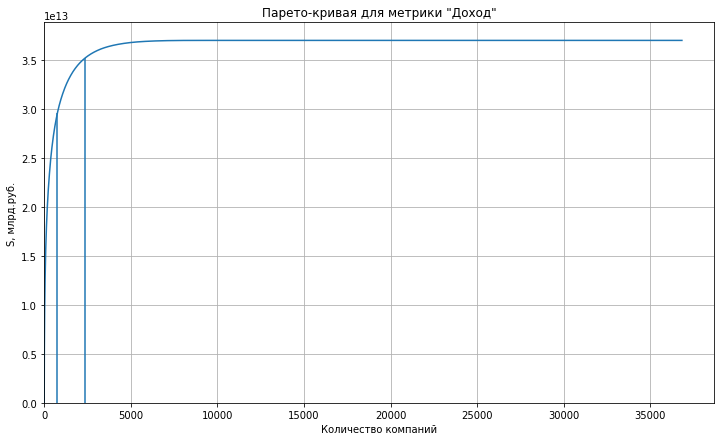

In [13]:
x = [i for i in range(0, df_income[0].size + 1)]
y = []
sum = 0
for i in range(df_income[1].size + 1):
    if i != 0:
        sum += df_income[1][i - 1]
    y.append(sum)
    
plt.figure(figsize=[12, 7])
plt.plot(x, y, color='tab:blue')
A = AA + AB + AC
B = BA + BB + BC + A
plt.vlines(x = A, ymin= 0, ymax = y[A], color='tab:blue')
plt.vlines(x = B, ymin= 0, ymax = y[B], color='tab:blue')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Количество компаний")
plt.ylabel("S, млрд.руб.")
plt.title('Парето-кривая для метрики "Доход"')
plt.show()

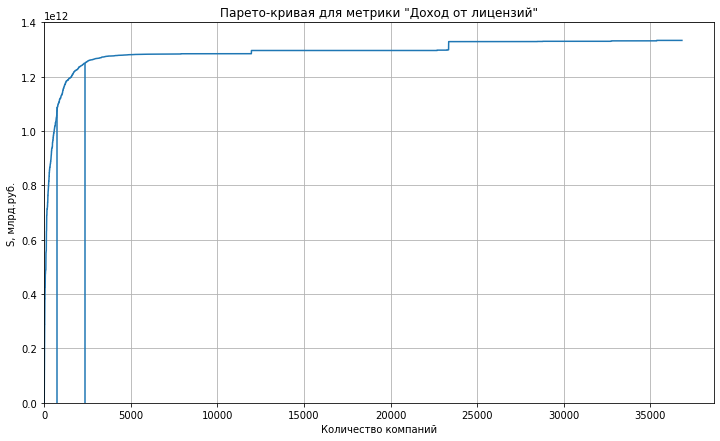

In [14]:
x = [i for i in range(0, df_income_lic[0].size + 1)]
y = []
sum = 0
for i in range(df_income_lic[1].size + 1):
    if i != 0:
        sum += df_income_lic[1][i - 1]
    y.append(sum)
    
plt.figure(figsize=[12, 7])
plt.plot(x, y, color='tab:blue')
A = AA + AB + AC
B = BA + BB + BC + A
plt.vlines(x = A, ymin= 0, ymax = y[A], color='tab:blue')
plt.vlines(x = B, ymin= 0, ymax = y[B], color='tab:blue')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Количество компаний")
plt.ylabel("S, млрд.руб.")
plt.title('Парето-кривая для метрики "Доход от лицензий"')
plt.show()

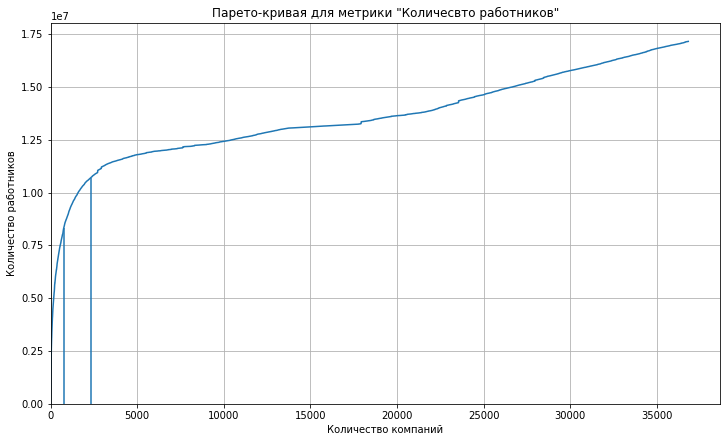

In [15]:
x = [i for i in range(0, df_employee_num[0].size + 1)]
y = []
sum = 0
for i in range(df_employee_num[1].size + 1):
    if i != 0:
        sum += df_employee_num[1][i - 1]
    y.append(sum)
    
plt.figure(figsize=[12, 7])
plt.plot(x, y, color='tab:blue')
A = AA + AB + AC
B = BA + BB + BC + A
plt.vlines(x = A, ymin= 0, ymax = y[A], color='tab:blue')
plt.vlines(x = B, ymin= 0, ymax = y[B], color='tab:blue')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Количество компаний")
plt.ylabel("Количество работников")
plt.title('Парето-кривая для метрики "Количесвто работников"')
plt.show()

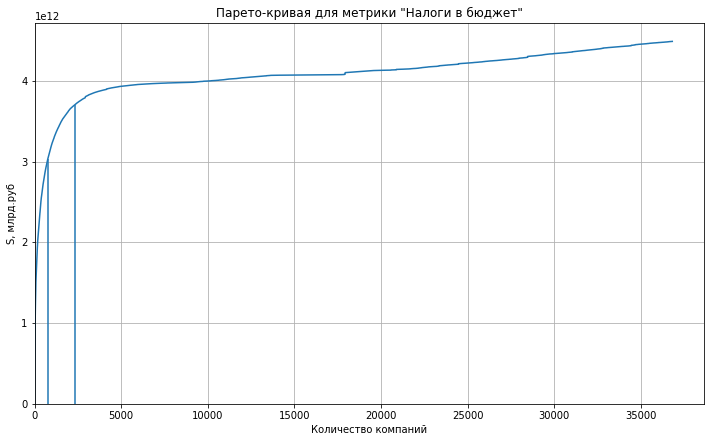

In [16]:
x = [i for i in range(0, df_taxes[0].size + 1)]
y = []
sum = 0
for i in range(df_taxes[1].size + 1):
    if i != 0:
        sum += df_taxes[1][i - 1]
    y.append(sum)
    
plt.figure(figsize=[12, 7])
plt.plot(x, y, color='tab:blue')
A = AA + AB + AC
B = BA + BB + BC + A
plt.vlines(x = A, ymin= 0, ymax = y[A], color='tab:blue')
plt.vlines(x = B, ymin= 0, ymax = y[B], color='tab:blue')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Количество компаний")
plt.ylabel("S, млрд.руб")
plt.title('Парето-кривая для метрики "Налоги в бюджет"')
plt.show()